1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothic')

file_path = r"./data/customer_data.csv"
market_df = pd.read_csv(file_path, sep='\t')

market_df

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,2021-09,1975,79589900.0,배우자 있음,1,46,921700,55900,236600,...,9,4,2,0,0,0,0,0,0,11
2236,4001,2022-09,1954,83218200.0,배우자 있음,3,56,527800,0,39000,...,8,5,7,1,0,0,0,0,0,11
2237,7270,2022-04,1989,74075300.0,이혼,0,91,1180400,62400,282100,...,2,13,1,0,0,0,1,0,0,11
2238,8235,2022-04,1964,90018500.0,배우자 있음,1,8,556400,39000,278200,...,6,10,2,0,0,0,0,0,0,11


2. 데이터 확인 및 전처리

In [2]:
# 결측치 확인
market_df.isnull().sum()

ID                        0
signup_ym                 0
birth_year                0
annual_income            24
marital_status            0
children                  0
recency                   0
amount_alcohol            0
amount_fruit              0
amount_meat               0
amount_fish               0
amount_snack              0
amount_general            0
num_purchase_web          0
num_purchase_store        0
num_purchase_discount     0
promotion_1               0
promotion_2               0
promotion_3               0
promotion_4               0
promotion_5               0
promotion_6               0
revenue                   0
dtype: int64

In [3]:
# 결측치 제거
market_df = market_df.dropna()

market_df.isnull().sum()

ID                       0
signup_ym                0
birth_year               0
annual_income            0
marital_status           0
children                 0
recency                  0
amount_alcohol           0
amount_fruit             0
amount_meat              0
amount_fish              0
amount_snack             0
amount_general           0
num_purchase_web         0
num_purchase_store       0
num_purchase_discount    0
promotion_1              0
promotion_2              0
promotion_3              0
promotion_4              0
promotion_5              0
promotion_6              0
revenue                  0
dtype: int64

In [4]:
# 출생 연도 나이로 변경
market_df['birth_year'] = 2023 - market_df['birth_year']
market_df = market_df.rename(columns={'birth_year': 'age'})

# 나이 이상치 제거
market_df = market_df[market_df['age'] < 100]


C:\Users\Owner\AppData\Local\Temp\ipykernel_23428\3802913490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_df['birth_year'] = 2023 - market_df['birth_year']


In [5]:
# 구매 금액 합계 칼럼 생성
data_amount_total = (
    market_df['amount_alcohol']
    + market_df['amount_fruit']
    + market_df['amount_meat']
    + market_df['amount_fish']
    + market_df['amount_snack']
    + market_df['amount_general']
)

In [6]:
# 칼럼 위치 특정
index_amount_general = market_df.columns.get_loc('amount_general')

In [7]:
# 칼럼 추가
market_df.insert(
    loc=index_amount_general + 1,
    column='amount_total',
    value=data_amount_total,
)


In [8]:
# 구매 횟수 합계
num_purchase_total = (
    market_df['num_purchase_web']
    + market_df['num_purchase_store']
    + market_df['num_purchase_discount']
)

index_discount = market_df.columns.get_loc('num_purchase_discount')
market_df.insert(
    loc=index_discount + 1,
    column='num_purchase_total',
    value=num_purchase_total
)

In [9]:
# 불필요한 컬럼 제거
market_df = market_df.drop(columns=['ID', 'revenue'])

3. 인구통계학적 고객 정보 분석
    1. 연령 분포

In [10]:
# 연령대 조정
age_bins = list(range(10, 81, 10))
age_labels = [f"{x}대" for x in age_bins[:-1]]

age_group = pd.cut(
    x=market_df['age'],  # 구간화할 데이터
    bins=age_bins,  # 구간 리스트
    labels=age_labels,  # 구간 이름 리스트
    right=False  # 왼쪽 값 이상 오른쪽 값 미만
)

In [11]:
# 구간화한 데이터 추가
market_df.insert(
    loc=market_df.columns.get_loc('age') + 1,
    column='age_group',
    value=age_group,
)

In [12]:
age_group_replace_dict = {
    '10대': '20대 이하',
    '20대': '20대 이하',
    '60대': '60대 이상',
    '70대': '60대 이상',
}
market_df['age_group'] = market_df['age_group'].replace(age_group_replace_dict)


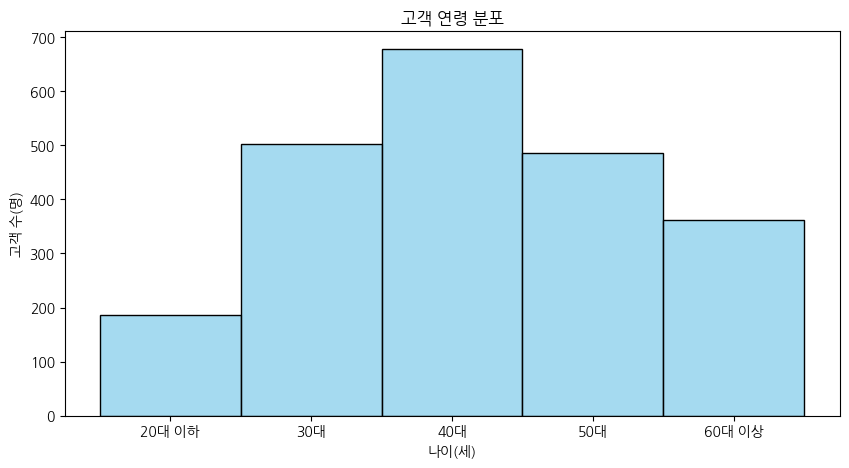

In [13]:
plt.rcParams['figure.figsize'] = (10, 5)

# 연령 분포
sns.histplot(market_df['age_group'], color='skyblue')
plt.title('고객 연령 분포')
plt.xlabel('나이(세)')
plt.ylabel('고객 수(명)')

plt.show()

2. 연소득 분포

In [14]:
# 연소득 이상치 제거
income = market_df['annual_income']
Q1 = income.quantile(0.25)
Q3 = income.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

normal_condition = (lower_bound <= income) & (income <= upper_bound)
market_df = market_df[normal_condition]

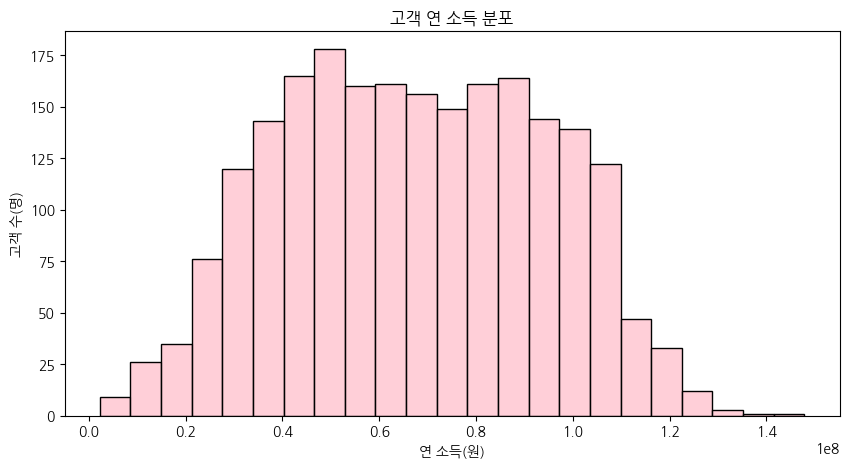

In [15]:
plt.rcParams['figure.figsize'] = (10, 5)

# 연 소득 분포
sns.histplot(market_df['annual_income'], color='pink')
plt.title('고객 연 소득 분포')
plt.xlabel('연 소득(원)')
plt.ylabel('고객 수(명)')

plt.show()

3. RFM 기법 활용하여 고객 세그먼트 분류

In [16]:
# 등급 개수 변수 생성
num_grades = 3

# 각 항목 등급 변수
grade_labels = list(range(1, num_grades+1))

In [17]:
# Recency 등급
recency_grade = pd.qcut(x=market_df['recency'], q=num_grades, labels=grade_labels[::-1])

# Recency 등급 컬럼 df에 추가
market_df['recency_grade'] = recency_grade

market_df['recency_grade'].value_counts()


recency_grade
3    752
1    730
2    723
Name: count, dtype: int64

In [18]:
# 각 등급의 매출 합계
group_recency = market_df.groupby('recency_grade').sum(numeric_only=True).reset_index()

group_recency

,recency_grade,age,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,...,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,3,34326,5.059218e+10,678,11988,293945600,26728000,157576900,37583000,25539800,...,3103,4386,1693,9182,54,12,67,55,60,179
1,2,33737,4.818995e+10,724,35840,294073000,23675600,151742500,35046700,25147200,...,2992,4240,1771,9003,47,8,47,52,48,95
2,1,33578,4.919261e+10,690,60237,289602300,25281100,164547500,35599200,27076400,...,2947,4215,1648,8810,41,10,49,57,53,59


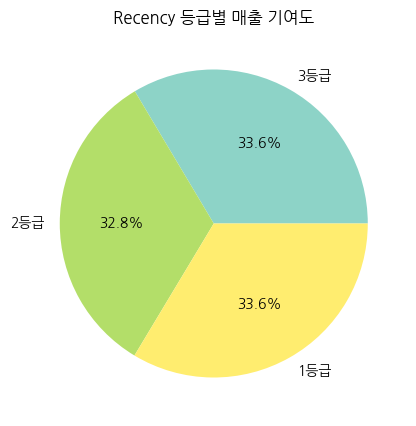

In [19]:
# 등급별 매출 기여도 시각화
amount_total = group_recency['amount_total']
cmap = plt.get_cmap("Set3")
colors = cmap(np.linspace(0, 1, num_grades))

plt.figure(figsize=(10, 5))
plt.pie(amount_total, labels=[f'{x}등급' for x in grade_labels[::-1]], autopct="%1.1f%%", colors=colors)
plt.title('Recency 등급별 매출 기여도')

plt.show()

In [20]:
# Frequency 등급
market_df['frequency_grade'] = pd.qcut(
    x=market_df['num_purchase_total'], q=num_grades, labels=grade_labels
)

market_df['frequency_grade'].value_counts()

frequency_grade
1    851
2    679
3    675
Name: count, dtype: int64

In [21]:
# 각 등급의 매출 합계
group_frequency = market_df.groupby('frequency_grade').sum(numeric_only=True).reset_index()

group_frequency

,frequency_grade,age,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,...,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,1,36992,3.888393e+10,989,41579,55630900,7387900,38834900,10792600,7022600,...,1477,2560,1365,5402,7,3,61,8,7,80
1,2,31947,5.268116e+10,496,33525,342971200,32916000,220378600,47747700,33254000,...,2940,4021,1522,8483,69,14,54,69,87,130
2,3,32702,5.640964e+10,607,32961,479018800,35380800,214653400,49688600,37486800,...,4625,6260,2225,13110,66,13,48,87,67,123


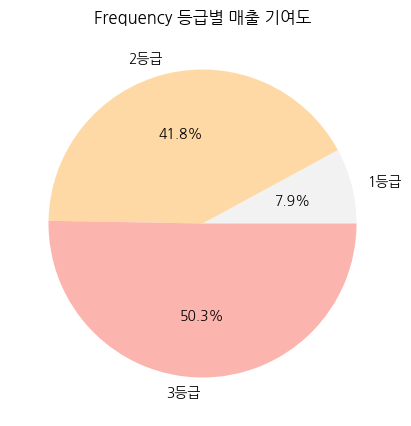

In [22]:
# 등급별 매출 기여도 시각화
amount_total = group_frequency['amount_total']
cmap = plt.get_cmap("Pastel1_r")
colors = cmap(np.linspace(0, 1, num_grades))

plt.figure(figsize=(10, 5))
plt.pie(amount_total, labels=[f'{x}등급' for x in grade_labels], autopct="%1.1f%%", colors=colors)
plt.title('Frequency 등급별 매출 기여도')

plt.show()

In [23]:
# Monetary 등급
market_df['monetary_grade'] = pd.qcut(
    x=market_df['amount_total'], q=num_grades, labels=grade_labels
)

market_df['monetary_grade'].value_counts()

monetary_grade
1    735
2    735
3    735
Name: count, dtype: int64

In [24]:
# 각 등급의 매출 합계
group_monetary = market_df.groupby('monetary_grade').sum(numeric_only=True).reset_index()

group_monetary

,monetary_grade,age,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,...,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,1,31486,2.984158e+10,944,35704,17254900,3122600,11546600,4572100,3257800,...,1170,2091,1307,4568,0,2,56,3,0,57
1,2,34920,4.868252e+10,814,35495,212998500,16786900,84479200,23622300,16887000,...,3683,4407,2365,10455,15,4,42,56,8,91
2,3,35235,6.945063e+10,334,36866,647367500,55775200,377841100,80034500,57618600,...,4189,6343,1440,11972,127,24,65,105,153,185


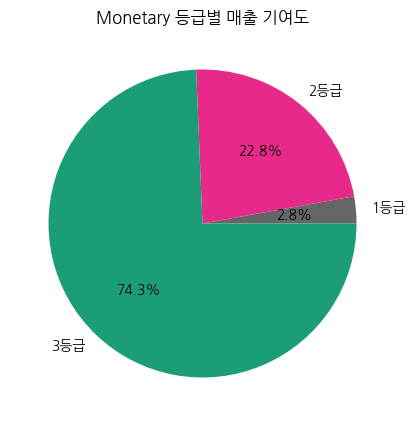

In [25]:
# 등급별 매출 기여도 시각화
amount_total = group_monetary['amount_total']
cmap = plt.get_cmap("Dark2_r")
colors = cmap(np.linspace(0, 1, num_grades))

plt.figure(figsize=(10, 5))
plt.pie(amount_total, labels=[f'{x}등급' for x in grade_labels], autopct="%1.1f%%", colors=colors)
plt.title('Monetary 등급별 매출 기여도')

plt.show()

3-2. 가중합을 이용해 RFM 고객 세그먼트 분류

In [26]:
# 가중치 부여
weight = {}
weight['recency'] = 1 / 3
weight['frequency'] = 1 / 3
weight['monetary'] = 1 / 3

In [27]:
# 고객 지표 컬럼 생성
market_df['rfm_score'] = (
    weight['recency'] * market_df['recency_grade'].astype('int')
    + weight['frequency'] * market_df['frequency_grade'].astype('int')
    + weight['monetary'] * market_df['monetary_grade'].astype('int')
)

In [28]:
# 구간화
def rfm_segment_bins(x):
    if x < 5 / 3:
        return 1
    elif x <= 7 / 3:
        return 2
    else:
        return 3

market_df['rfm_segment'] = market_df['rfm_score'].apply(rfm_segment_bins)

market_df['rfm_segment'].value_counts()

rfm_segment
1    926
2    811
3    468
Name: count, dtype: int64

In [29]:
# 고객 세그먼트별 매출 기여도
group_rfm = market_df.groupby('rfm_segment').sum(numeric_only=True).reset_index()

group_rfm

,rfm_segment,age,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,...,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,rfm_score
0,1,40574,4.238087e+10,1119,51275,61717500,7169500,36097100,10396100,7248800,...,2987,1709,6548,6,4,69,12,4,68,1296.000000
1,2,38632,6.346707e+10,661,44676,439615800,38247300,245863800,55347500,39518700,...,5574,2193,11960,66,14,55,85,81,130,1773.666667
2,3,22435,4.212679e+10,312,12114,376287600,30267900,191906000,42485300,30995900,...,4280,1210,8487,70,12,39,67,76,135,1289.000000


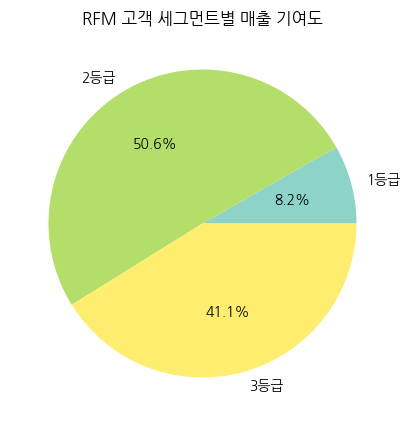

In [30]:
# 세그먼트별 매출 기여도 시각화
amount_total = group_rfm['amount_total']
cmap = plt.get_cmap("Set3")
colors = cmap(np.linspace(0, 1, num_grades))

plt.figure(figsize=(10, 5))
plt.pie(amount_total, labels=[f'{x}등급' for x in grade_labels], autopct="%1.1f%%", colors=colors)
plt.title('RFM 고객 세그먼트별 매출 기여도')

plt.show()

In [31]:
# Recency 등급은 등급별 차이가 크지 않아, 가중치 줄임
# 가중치 재설정
weight['recency'] = 0.2
weight['frequency'] = 0.4
weight['monetary'] = 0.4

# 가중합 계산
market_df['rfm_score'] = (
    weight['recency'] * market_df['recency_grade'].astype('int')
    + weight['frequency'] * market_df['frequency_grade'].astype('int')
    + weight['monetary'] * market_df['monetary_grade'].astype('int')
)

# RFM 고객 지표 구간화
market_df['rfm_segment'] = market_df['rfm_score'].apply(rfm_segment_bins)

market_df['rfm_segment'].value_counts()


rfm_segment
1    802
3    792
2    611
Name: count, dtype: int64

In [32]:
group_rfm = market_df.groupby('rfm_segment').sum(numeric_only=True).reset_index()

group_rfm

,rfm_segment,age,annual_income,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,...,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,rfm_score
0,1,34844,3.401424e+10,997,40993,26176800,4089800,16556800,6091800,4165200,...,2340,1386,5062,0,2,57,5,1,60,996.6
1,2,28808,4.383286e+10,545,34358,231695100,22575800,133016000,31023200,22217000,...,3529,1585,7852,31,6,44,48,37,78,1250.8
2,3,37989,7.012763e+10,550,32714,619749000,49019100,324294100,71113900,51381200,...,6972,2141,14081,111,22,62,111,123,195,2096.6


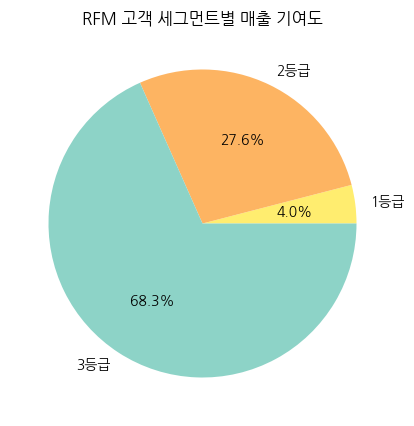

In [34]:
# 세그먼트별 매출 기여도 시각화
amount_total = group_rfm['amount_total']
cmap = plt.get_cmap("Set3_r")
colors = cmap(np.linspace(0, 1, num_grades))

plt.figure(figsize=(10, 5))
plt.pie(amount_total, labels=[f'{x}등급' for x in grade_labels], autopct="%1.1f%%", colors=colors)
plt.title('RFM 고객 세그먼트별 매출 기여도')

plt.show()

3-3. 세그멘트별 연령대 분포

In [35]:
# 세그먼트와 연령대를 기준으로 고객 수 집계
group_rfm_age = market_df.groupby(['rfm_segment', 'age_group']).size().reset_index()

group_rfm_age

,rfm_segment,age_group,0
0,1,20대 이하,84
1,1,30대,231
2,1,40대,268
3,1,50대,135
4,1,60대 이상,84
5,2,20대 이하,46
6,2,30대,121
7,2,40대,169
8,2,50대,161
9,2,60대 이상,114


In [36]:
# 컬럼명 수정
group_rfm_age = group_rfm_age.rename(columns={0: 'customer_count'})

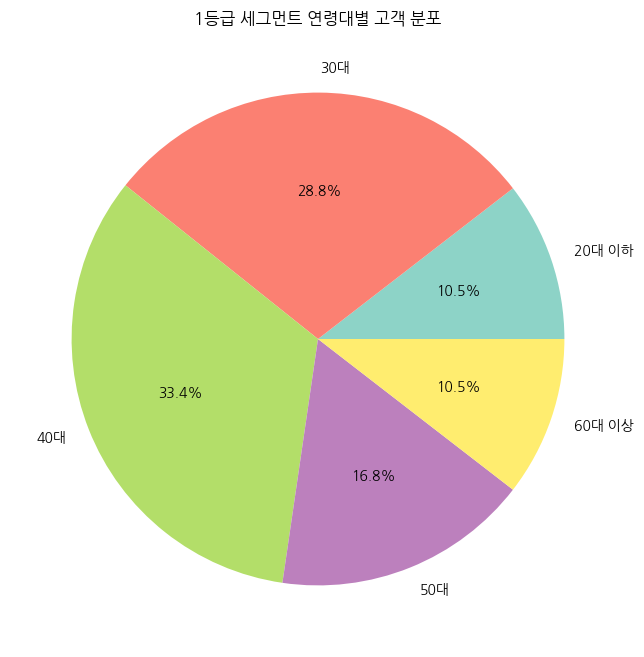

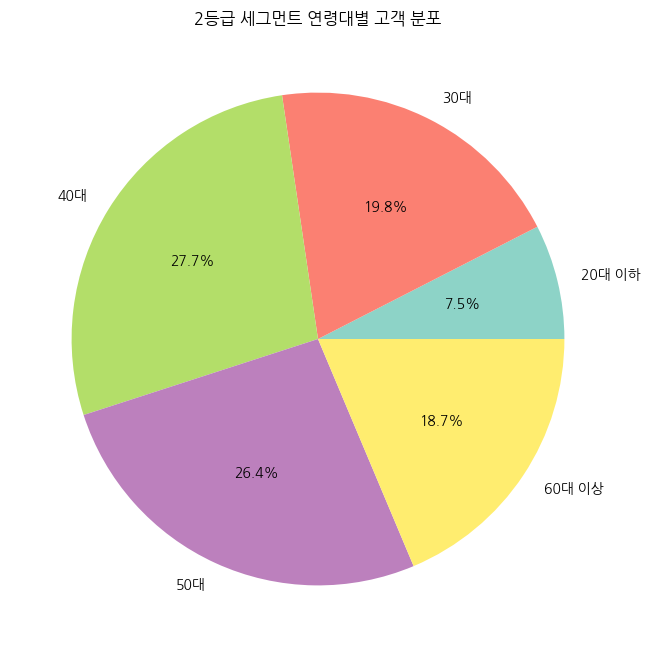

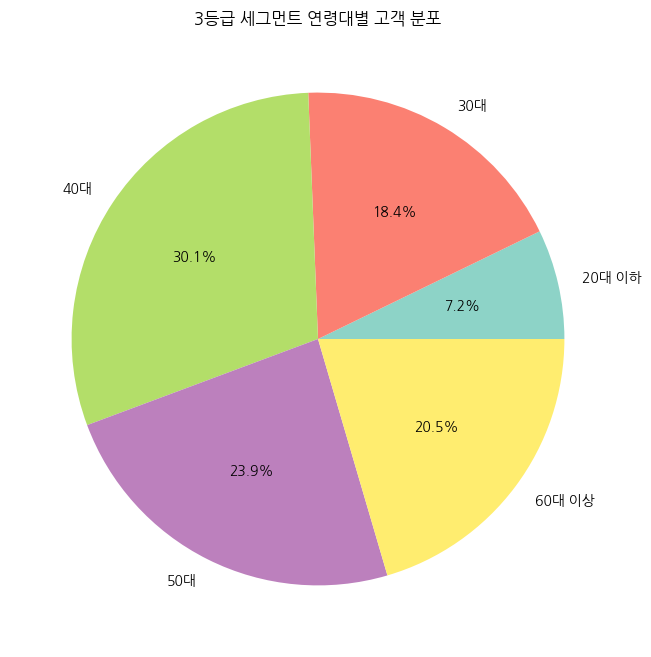

In [45]:
# 시각화
for i in range(1, num_grades+1):
    age_dist = group_rfm_age[group_rfm_age['rfm_segment'] == i]
    
    customer_counts = age_dist['customer_count']
    age_groups = age_dist['age_group'].unique()
    
    cmap = plt.get_cmap("Set3")
    colors = cmap(np.linspace(0, 1, len(age_groups)))
    
    plt.figure(figsize=(8, 8))
    plt.pie(customer_counts, labels=age_groups, autopct="%.1f%%", colors=colors)
    plt.title(f"{i}등급 세그먼트 연령대별 고객 분포")
    
    plt.show()

3-4. 세그먼트별 가족 구성 분포

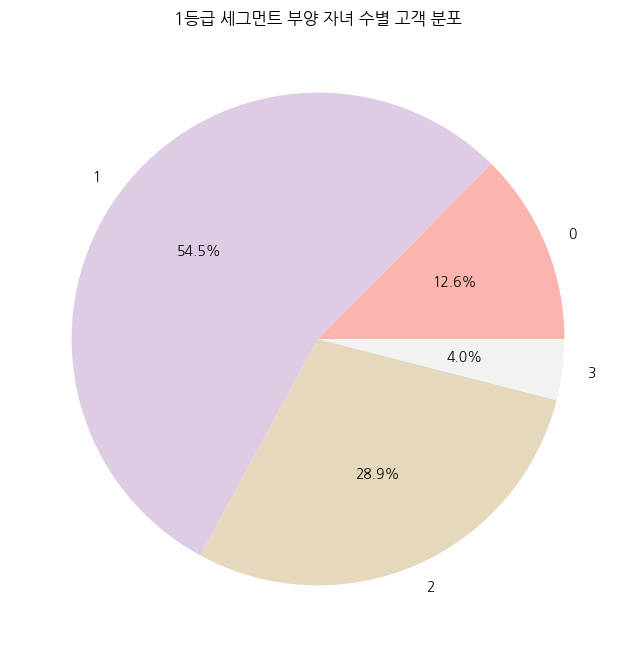

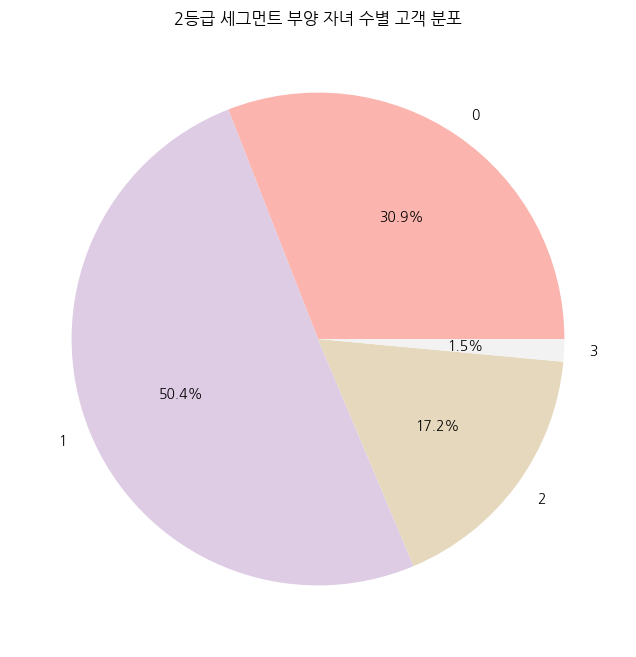

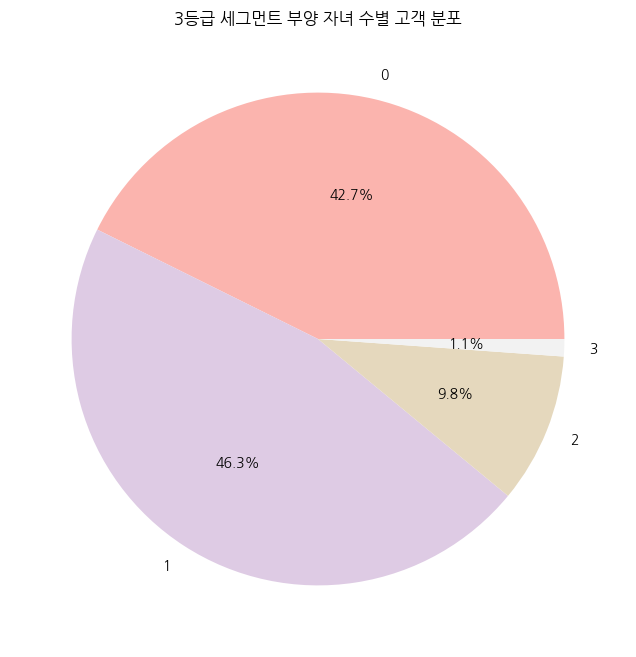

In [52]:
# 세그먼트별 부양 자녀의 수
group_rfm_children = market_df.groupby(['rfm_segment', 'children']).size().reset_index()
group_rfm_children = group_rfm_children.rename(columns={0: 'customer_count'})

# 시각화
for i in range(1, num_grades+1):
    children_dist = group_rfm_children[group_rfm_children['rfm_segment'] == i]
    
    customer_counts = children_dist['customer_count']
    children_groups = children_dist['children'].unique()
    
    cmap = plt.get_cmap("Pastel1")
    colors = cmap(np.linspace(0, 1, len(children_groups)))
    
    plt.figure(figsize=(8, 8))
    plt.pie(customer_counts, labels=children_groups, autopct="%.1f%%", colors=colors)
    plt.title(f"{i}등급 세그먼트 부양 자녀 수별 고객 분포")
    
    plt.show()

3-5. 고객 세그먼트당 품목별 매출 기여도

In [55]:
# 관련 컬럼 추출
selected_cols = [
    col
    for col in group_rfm.columns
    if col.startswith('amount_') and col != 'amount_total'
]
selected_cols.append('rfm_segment')
selected_cols


['amount_alcohol',
 'amount_fruit',
 'amount_meat',
 'amount_fish',
 'amount_snack',
 'amount_general',
 'rfm_segment']

In [56]:
# 관련 변수 생성
amount_sum_per_product = group_rfm[selected_cols]
amount_sum_per_product = amount_sum_per_product.set_index('rfm_segment')
amount_sum_per_product

,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general
rfm_segment,,,,,,
1,26176800,4089800,16556800,6091800,4165200,13079300
2,231695100,22575800,133016000,31023200,22217000,39907400
3,619749000,49019100,324294100,71113900,51381200,73303100


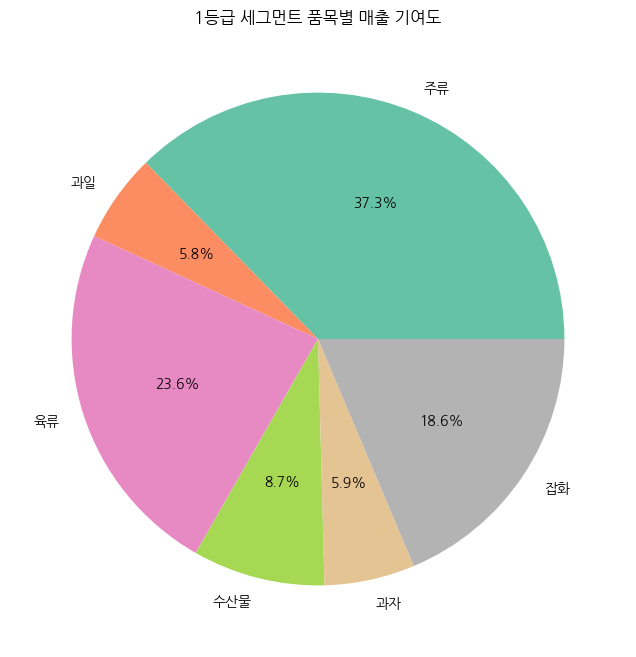

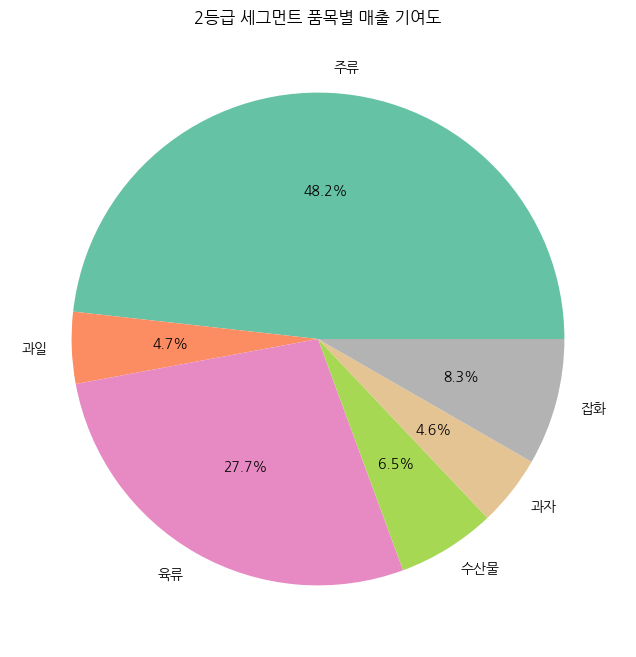

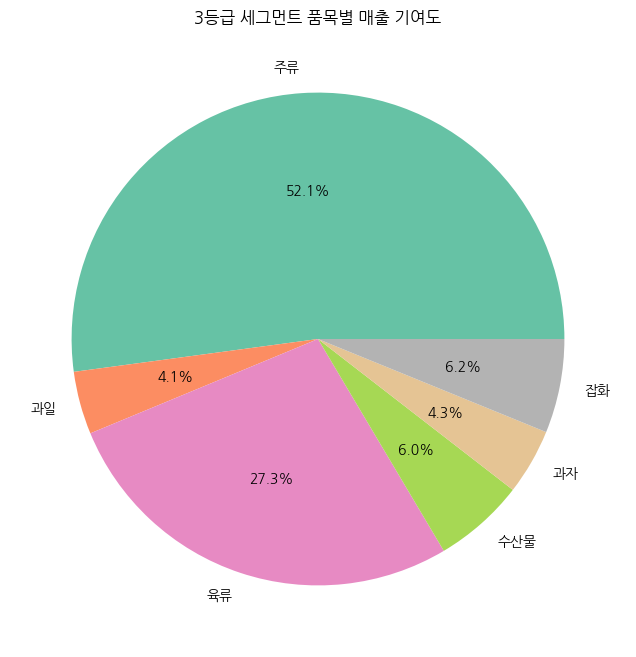

In [58]:
# 시각화
for i in range(1, num_grades+1):
    product_dist = amount_sum_per_product.loc[i]
    labels = ['주류', '과일', '육류', '수산물', '과자', '잡화']
    cmap = plt.get_cmap("Set2")
    colors = cmap(np.linspace(0, 1, len(labels)))
    
    plt.figure(figsize=(8, 8))
    plt.pie(product_dist, labels=labels, autopct="%.1f%%", colors=colors)
    plt.title(f"{i}등급 세그먼트 품목별 매출 기여도")
    
    plt.show()

3-6. 세그먼트별 프로모션 참여율

In [59]:
# 관련 컬럼 추출
selected_cols = [f'promotion_{i}' for i in range(1, 7)]
selected_cols.append('rfm_segment')
selected_cols

['promotion_1',
 'promotion_2',
 'promotion_3',
 'promotion_4',
 'promotion_5',
 'promotion_6',
 'rfm_segment']

In [74]:
# 관련 변수 생성
avg_promo = group_rfm[selected_cols]
avg_promo = avg_promo.set_index('rfm_segment')
avg_promo

,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
rfm_segment,,,,,,
1,0,2,57,5,1,60
2,31,6,44,48,37,78
3,111,22,62,111,123,195


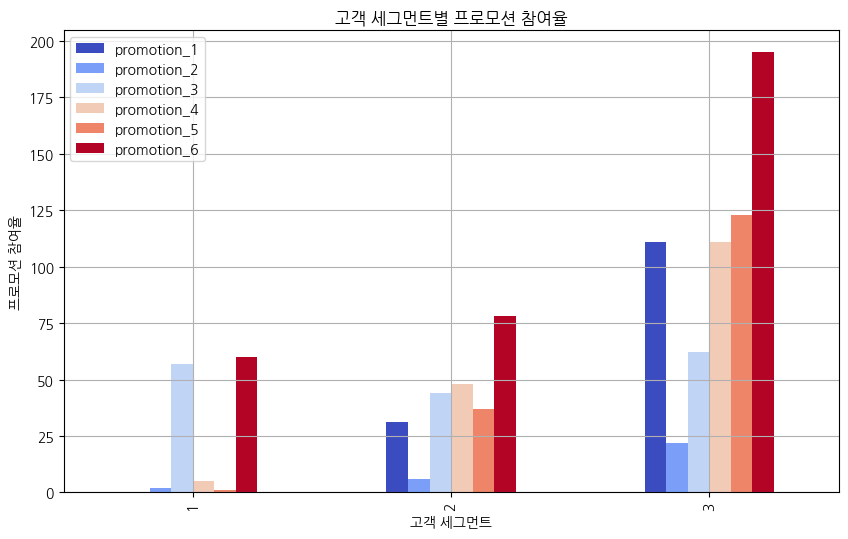

In [78]:
# 시각화
num_segments = len(avg_promo)
cmap = plt.get_cmap("coolwarm")
colors = cmap(np.linspace(0, 1, 6))

ax = avg_promo.plot(kind='bar', color=colors, figsize=(10, 6))
plt.title('고객 세그먼트별 프로모션 참여율')
plt.xlabel('고객 세그먼트')
plt.ylabel('프로모션 참여율')
plt.grid()

plt.show()
